   Iterasi         x  Selisih |x_new - x_old|
0        0 -1.500000             0.000000e+00
1        1 -1.520000             0.000000e+00
2        2 -1.521403             1.402644e-03
3        3 -1.521380             2.296117e-05
4        4 -1.521380             2.431823e-08


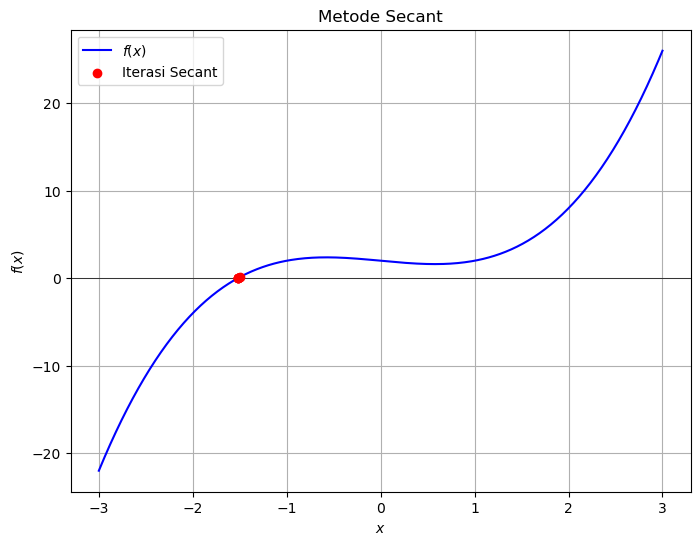

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Secant
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    # Fungsi untuk menemukan akar dari fungsi f menggunakan metode Secant
    # f       : Fungsi yang akar-akarnya dicari
    # x0, x1  : Dua nilai awal untuk memulai iterasi
    # tol     : Toleransi kesalahan, iterasi akan berhenti jika perbedaan antar iterasi lebih kecil dari tol
    # max_iter: Jumlah maksimum iterasi

    iterasi = 0  # Inisialisasi jumlah iterasi
    nilai_x = [x0, x1]  # List untuk menyimpan nilai-nilai x dari setiap iterasi, dimulai dengan dua nilai awal
    selisih = []  # List untuk menyimpan perbedaan antara dua iterasi berturut-turut (selisih)

    while iterasi < max_iter:  # Looping hingga mencapai jumlah maksimum iterasi
        f_x0 = f(x0)  # Hitung f(x0) untuk iterasi ini
        f_x1 = f(x1)  # Hitung f(x1) untuk iterasi ini
        
        # Cek apakah selisih f(x1) dan f(x0) terlalu kecil untuk menghindari pembagian dengan angka sangat kecil
        if abs(f_x1 - f_x0) < 1e-10:
            print("Denominator terlalu kecil, tidak bisa dilanjutkan.")  # Berhenti jika perbedaan terlalu kecil
            break
            
        x_baru = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0) # Hitung nilai baru x menggunakan rumus metode Secant
        error = abs(x_baru - x1) # Hitung error sebagai perbedaan absolut antara nilai baru x dan nilai x sebelumnya
        nilai_x.append(x_baru) # Simpan nilai x baru ke dalam list nilai_x
        selisih.append(error) # Simpan selisih (error) ke dalam list selisih
       
        if error < tol:  # Jika selisih lebih kecil dari toleransi yang ditentukan, iterasi dihentikan
            break
        
        # Perbarui nilai x0 dan x1 untuk iterasi berikutnya
        x0, x1 = x1, x_baru
        
        # Tambah jumlah iterasi
        iterasi += 1
    
    # Kembalikan hasil: akar yang ditemukan (x_baru), daftar nilai x dari setiap iterasi, dan daftar selisih
    return x_baru, nilai_x, selisih


# Fungsi untuk plotting hasil iterasi
def plot_secant_method(f, nilai_x, x_range):
    # Fungsi untuk memplot hasil iterasi dari metode Secant
    # f         : Fungsi yang akar-akarnya dicari
    # nilai_x   : Daftar nilai x dari setiap iterasi
    # x_range   : Rentang x untuk plotting (misal: [a, b])

    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat array x untuk plotting, dengan 400 titik antara x_range[0] dan x_range[1]
    y_f = f(x)  # Menghitung nilai fungsi f untuk setiap x dalam array

    plt.figure(figsize=(8, 6))  # Membuat figure dengan ukuran 8x6 inch
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Memplot grafik fungsi f(x) berwarna biru
    plt.axhline(0, color='black', linewidth=0.5)  # Memplot garis horizontal di y=0 untuk sumbu x
    
    # Memplot titik-titik hasil iterasi Secant (nilai_x)
    plt.scatter(nilai_x, [f(x) for x in nilai_x], color='red', label='Iterasi Secant', zorder=5)  
    
    # Plot garis secant dari tiap iterasi (mulai dari iterasi ke-2)
    for i in range(2, len(nilai_x)):
        # Garis secant antara dua titik: (nilai_x[i-2], f(nilai_x[i-2])) dan (nilai_x[i-1], f(nilai_x[i-1]))
        plt.plot([nilai_x[i-2], nilai_x[i-1]], [f(nilai_x[i-2]), f(nilai_x[i-1])], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')  # Label untuk sumbu x
    plt.ylabel(r'$f(x)$')  # Label untuk sumbu y
    plt.title('Metode Secant')  # Judul plot
    plt.legend()  # Menampilkan legenda untuk label-label
    plt.grid(True)  # Menampilkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi untuk menampilkan tabel hasil iterasi
def print_iteration_table(x_values, diff_values):
    # Fungsi untuk mencetak tabel hasil iterasi metode Secant atau metode numerik lainnya
    # x_values   : Daftar nilai x yang dihasilkan dari setiap iterasi
    # diff_values: Daftar selisih (error) antara dua iterasi berturut-turut
    
    iter_nums = np.arange(0, len(x_values))  # Membuat daftar nomor iterasi, mulai dari 0 hingga jumlah elemen di x_values
    
    # Buat dictionary dengan tiga kolom: Iterasi, nilai x, dan selisih |x_new - x_old|
    # Selisih dimulai dari iterasi ke-2, sehingga menambahkan dua angka 0 di awal
    data = {
        'Iterasi': iter_nums,  # Kolom nomor iterasi
        'x': x_values,  # Kolom nilai x dari setiap iterasi
        'Selisih |x_new - x_old|': [0, 0] + diff_values  # Kolom selisih dimulai dari iterasi ke-2 (dua nilai 0 di awal)
    }
    
    df = pd.DataFrame(data)  # Mengubah dictionary menjadi DataFrame menggunakan pandas
    print(df)  # Mencetak DataFrame sebagai tabel


# Persamaan f(x)
def f(x):
    return (x**3) - x + 2 # Contoh persamaan f(x)

# Titik awal
x0 = -1.5
x1 = -1.52

# Rentang untuk plotting
x_range = [-3, 3]

# Melakukan iterasi Secant
x_root, nilai_x, selisih = secant_method(f, x0, x1)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_secant_method(f, nilai_x, x_range)


#

   Iterasi                    x  Selisih |x_new - x_old|
0        0 -0.000000- 5.000000j             0.000000e+00
1        1 -0.000000-11.000000j             0.000000e+00
2        2  0.000000- 4.062500j             6.937500e+00
3        3  0.000000- 3.630705j             4.317946e-01
4        4  0.000000- 3.217091j             4.136145e-01
5        5  0.000000- 3.166027j             5.106366e-02
6        6  0.000000- 3.162310j             3.717332e-03
7        7  0.000000- 3.162278j             3.217893e-05
8        8  0.000000- 3.162278j             1.907717e-08


C:\Users\Leonardo\anaconda3\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\Leonardo\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Leonardo\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


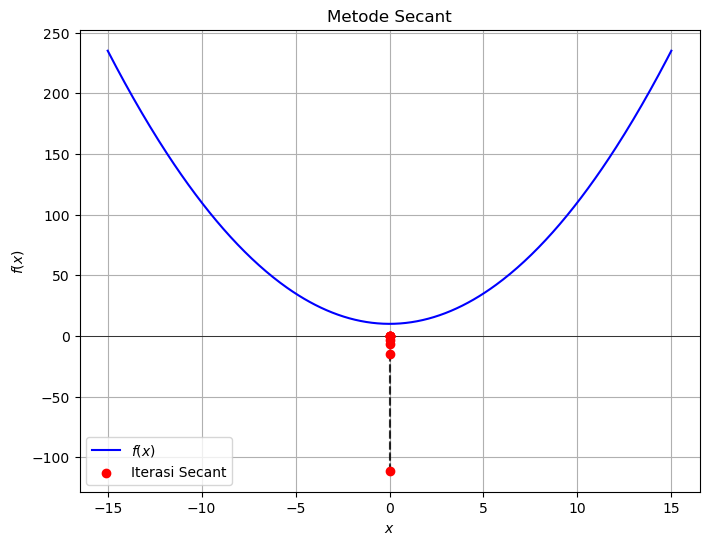

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Secant
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    # Fungsi untuk menemukan akar dari fungsi f menggunakan metode Secant
    # f       : Fungsi yang akar-akarnya dicari
    # x0, x1  : Dua nilai awal untuk memulai iterasi
    # tol     : Toleransi kesalahan, iterasi akan berhenti jika perbedaan antar iterasi lebih kecil dari tol
    # max_iter: Jumlah maksimum iterasi

    iterasi = 0  # Inisialisasi jumlah iterasi
    nilai_x = [x0, x1]  # List untuk menyimpan nilai-nilai x dari setiap iterasi, dimulai dengan dua nilai awal
    selisih = []  # List untuk menyimpan perbedaan antara dua iterasi berturut-turut (selisih)

    while iterasi < max_iter:  # Looping hingga mencapai jumlah maksimum iterasi
        f_x0 = f(x0)  # Hitung f(x0) untuk iterasi ini
        f_x1 = f(x1)  # Hitung f(x1) untuk iterasi ini
        
        # Cek apakah selisih f(x1) dan f(x0) terlalu kecil untuk menghindari pembagian dengan angka sangat kecil
        if abs(f_x1 - f_x0) < 1e-10:
            print("Denominator terlalu kecil, tidak bisa dilanjutkan.")  # Berhenti jika perbedaan terlalu kecil
            break
            
        x_baru = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0) # Hitung nilai baru x menggunakan rumus metode Secant
        error = abs(x_baru - x1) # Hitung error sebagai perbedaan absolut antara nilai baru x dan nilai x sebelumnya
        nilai_x.append(x_baru) # Simpan nilai x baru ke dalam list nilai_x
        selisih.append(error) # Simpan selisih (error) ke dalam list selisih
       
        if error < tol:  # Jika selisih lebih kecil dari toleransi yang ditentukan, iterasi dihentikan
            break
        
        # Perbarui nilai x0 dan x1 untuk iterasi berikutnya
        x0, x1 = x1, x_baru
        
        # Tambah jumlah iterasi
        iterasi += 1
    
    # Kembalikan hasil: akar yang ditemukan (x_baru), daftar nilai x dari setiap iterasi, dan daftar selisih
    return x_baru, nilai_x, selisih


# Fungsi untuk plotting hasil iterasi
def plot_secant_method(f, nilai_x, x_range):
    # Fungsi untuk memplot hasil iterasi dari metode Secant
    # f         : Fungsi yang akar-akarnya dicari
    # nilai_x   : Daftar nilai x dari setiap iterasi
    # x_range   : Rentang x untuk plotting (misal: [a, b])

    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat array x untuk plotting, dengan 400 titik antara x_range[0] dan x_range[1]
    y_f = f(x)  # Menghitung nilai fungsi f untuk setiap x dalam array

    plt.figure(figsize=(8, 6))  # Membuat figure dengan ukuran 8x6 inch
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Memplot grafik fungsi f(x) berwarna biru
    plt.axhline(0, color='black', linewidth=0.5)  # Memplot garis horizontal di y=0 untuk sumbu x
    
    # Memplot titik-titik hasil iterasi Secant (nilai_x)
    plt.scatter(nilai_x, [f(x) for x in nilai_x], color='red', label='Iterasi Secant', zorder=5)  
    
    # Plot garis secant dari tiap iterasi (mulai dari iterasi ke-2)
    for i in range(2, len(nilai_x)):
        # Garis secant antara dua titik: (nilai_x[i-2], f(nilai_x[i-2])) dan (nilai_x[i-1], f(nilai_x[i-1]))
        plt.plot([nilai_x[i-2], nilai_x[i-1]], [f(nilai_x[i-2]), f(nilai_x[i-1])], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')  # Label untuk sumbu x
    plt.ylabel(r'$f(x)$')  # Label untuk sumbu y
    plt.title('Metode Secant')  # Judul plot
    plt.legend()  # Menampilkan legenda untuk label-label
    plt.grid(True)  # Menampilkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi untuk menampilkan tabel hasil iterasi
def print_iteration_table(x_values, diff_values):
    # Fungsi untuk mencetak tabel hasil iterasi metode Secant atau metode numerik lainnya
    # x_values   : Daftar nilai x yang dihasilkan dari setiap iterasi
    # diff_values: Daftar selisih (error) antara dua iterasi berturut-turut
    
    iter_nums = np.arange(0, len(x_values))  # Membuat daftar nomor iterasi, mulai dari 0 hingga jumlah elemen di x_values
    
    # Buat dictionary dengan tiga kolom: Iterasi, nilai x, dan selisih |x_new - x_old|
    # Selisih dimulai dari iterasi ke-2, sehingga menambahkan dua angka 0 di awal
    data = {
        'Iterasi': iter_nums,  # Kolom nomor iterasi
        'x': x_values,  # Kolom nilai x dari setiap iterasi
        'Selisih |x_new - x_old|': [0, 0] + diff_values  # Kolom selisih dimulai dari iterasi ke-2 (dua nilai 0 di awal)
    }
    
    df = pd.DataFrame(data)  # Mengubah dictionary menjadi DataFrame menggunakan pandas
    print(df)  # Mencetak DataFrame sebagai tabel


# Persamaan f(x)
def f(x):
    return (x**2) + 10 # Contoh persamaan f(x)

# Titik awal
x0 = -5j
x1 = -11j

# Rentang untuk plotting
x_range = [-15, 15]

# Melakukan iterasi Secant
x_root, nilai_x, selisih = secant_method(f, x0, x1)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_secant_method(f, nilai_x, x_range)


   Iterasi         x  Selisih |x_new - x_old|
0        0 -2.000000             0.000000e+00
1        1 -1.900000             0.000000e+00
2        2 -1.618290             2.817099e-01
3        3 -1.578017             4.027333e-02
4        4 -1.571004             7.012478e-03
5        5 -1.570797             2.069916e-04
6        6 -1.570796             9.493599e-07


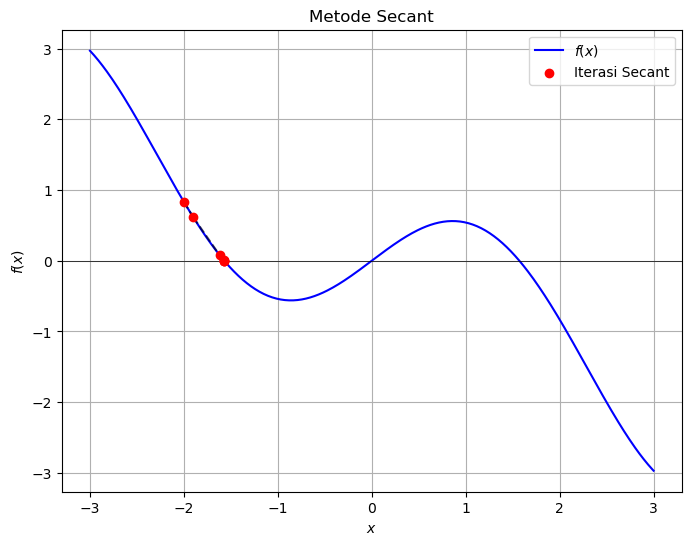

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Secant
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    iter_count = 0
    x_values = [x0, x1]
    diff_values = []  # Untuk menyimpan selisih antara iterasi
    
    while iter_count < max_iter:
        f_x0 = f(x0)
        f_x1 = f(x1)
        
        if abs(f_x1 - f_x0) < 1e-10:  # Menghindari pembagian dengan nilai yang terlalu kecil
            print("Denominator terlalu kecil, tidak bisa dilanjutkan.")
            break
        
        x_new = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        diff = abs(x_new - x1)
        x_values.append(x_new)
        diff_values.append(diff)
        
        if diff < tol:
            break
        
        x0, x1 = x1, x_new
        iter_count += 1
    
    return x_new, x_values, diff_values

# Fungsi untuk plotting hasil iterasi
def plot_secant_method(f, x_values, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)
    y_f = f(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.scatter(x_values, [f(x) for x in x_values], color='red', label='Iterasi Secant', zorder=5)
    
    # Plot garis dari tiap iterasi
    for i in range(2, len(x_values)):
        plt.plot([x_values[i-2], x_values[i-1]], [f(x_values[i-2]), f(x_values[i-1])], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f(x)$')
    plt.title('Metode Secant')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fungsi untuk menampilkan tabel hasil iterasi
def print_iteration_table(x_values, diff_values):
    iter_nums = np.arange(0, len(x_values))
    data = {
        'Iterasi': iter_nums,
        'x': x_values,
        'Selisih |x_new - x_old|': [0, 0] + diff_values  # Selisih dimulai dari iterasi ke-2
    }
    df = pd.DataFrame(data)
    print(df)

# Persamaan f(x)
def f(x):
    return x * np.cos(x) # Contoh persamaan f(x)

# Titik awal
x0 = -2
x1 = -1.9

# Rentang untuk plotting
x_range = [-3, 3]

# Melakukan iterasi Secant
x_root, x_values, diff_values = secant_method(f, x0, x1)

# Menampilkan tabel iterasi
print_iteration_table(x_values, diff_values)

# Plotting hasil iterasi
plot_secant_method(f, x_values, x_range)
